# Classifying Spy Data

The purpose of this notebook is to try to classify whether or not the next days value will be higher or lower than the previous.

In [1]:
# importing basic packages

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import plotly.express as px
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go



In [2]:
#mounting the notebook to my drive
from google.colab import drive
drive.mount('/content/drive')
#setting the directory to the proper folder
import os
os.chdir("/content/drive/My Drive/Stock Algorithim/Datasets")


Mounted at /content/drive


In [3]:
spyData=pd.read_csv("spydata.csv")

In [4]:
closeData=spyData.loc[:,"Close"]

In [5]:
closeData.iloc[5:13]

5     25.5324
6     25.5324
7     25.3549
8     25.3904
9     25.5146
10    25.3195
11    24.6807
12    24.6630
Name: Close, dtype: float64

In [6]:
lookback=10

In [7]:
data=dict()
data['y']=list()


In [8]:
for i in range(lookback):
  colName="Close-"+str(i)
  data[colName]=list()

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset


In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV


In [33]:
def dataHoldout ( holdout ):
  for i in range(lookback,len(closeData)-holdout,holdout):
    y= 0
    if closeData[i+holdout]-closeData[i]>0: # if the next days value is higher (the market goes up) assign 1 otheriwse assing 0
      y=1
    data['y'].append(y)
    for p in range(lookback):
      colName="Close-"+str(p)
      data[colName].append(closeData[i-p])
  df = pd.DataFrame(data)
  y=df.loc[:,'y']
  X=df.drop(columns=['y'])
  #X=scaler.fit_transform(df.drop(columns=['y']))
  return train_test_split(X, y, test_size=0.25, shuffle=False)

In [ ]:
df.to_csv("lookback-10.csv")

In [ ]:
#run this one and not previois ones
df=pd.read_csv("lookback-10.csv")

In [14]:
df['y'].value_counts()/df.shape[0]*100
#show percentage of each class
# balancaded data set

1    57.281931
0    42.718069
Name: y, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV
y=df.loc[:,'y']
X=df.drop(columns=['y'])
#X=scaler.fit_transform(df.drop(columns=['y']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Logisic Regresions
sucks for this.

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=45,max_iter =1000)

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=45),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [59]:
best_model = LogisticRegression(random_state=45,C = 0.001, penalty = 'l2' , solver='saga' ,max_iter=5000)

In [45]:

# Make predictions on the train data
#y_train_pred = clf.predict(X_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

In [49]:
maxHoldout= 10
scores=list()
for i in range(1,maxHoldout):
  X_train, X_test, y_train, y_test = dataHoldout(i)
  best_model.fit(X_train,y_train)
  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  scores.append(accuracy)
  #print("Holdout: ",i," Accuracy: ",accuracy)
scoresDF= pd.DataFrame({"Holdout":range(1,maxHoldout),"Accuracy": scores})
scoresDF=scoresDF.sort_values('Accuracy',ascending=False)

In [ ]:
X_train, X_test, y_train, y_test = dataHoldout(10)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [50]:
scoresDF.head()

,Holdout,Accuracy
8,9,0.559518
7,8,0.558749
6,7,0.558419
5,6,0.556794
4,5,0.555679


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

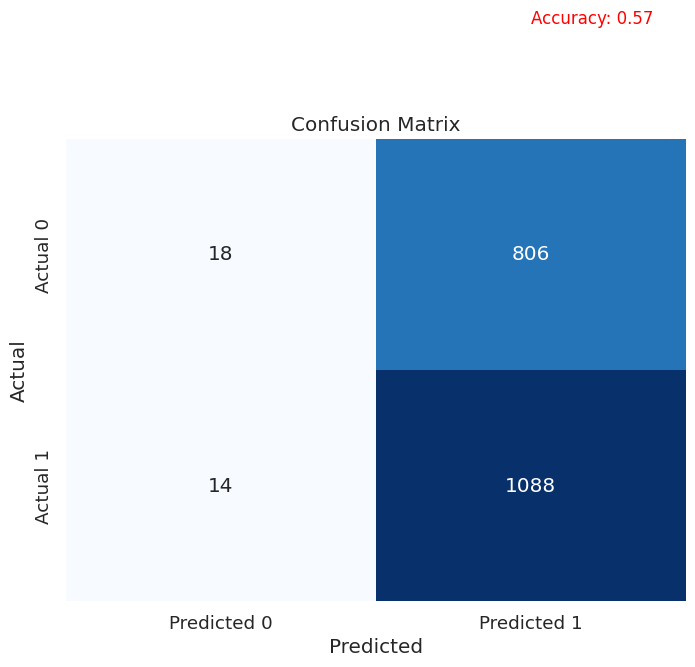

In [46]:


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
plt.text(1.5, -0.5, f"Accuracy: {accuracy:.2f}", fontsize=12, color="red")

plt.show()

# Random Forrest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)


In [ ]:

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_log_loss', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_log_loss')

In [ ]:
best_params = grid_search.best_params_
best_log_loss = -grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Log Loss:", best_log_loss)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Log Loss: 0.7005928936379087


In [ ]:
best_model=RandomForestClassifier(bootstrap= True, max_depth= 10, max_features = 'sqrt', min_samples_leaf =1 ,min_samples_split =5, n_estimators = 200)

In [ ]:
y_pred = best_model.fit(X_train,y_train)

NameError: ignored

In [ ]:
y_pred = best_model.predict(X_test)

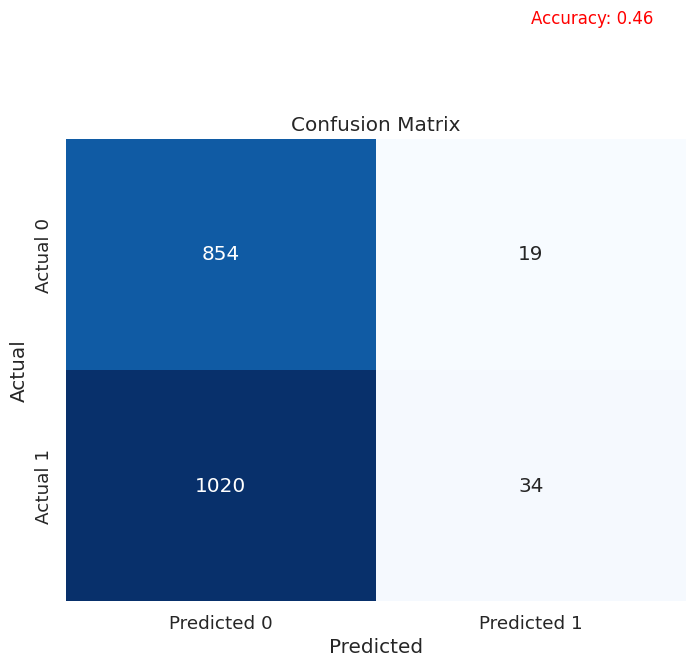

In [ ]:


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
plt.text(1.5, -0.5, f"Accuracy: {accuracy:.2f}", fontsize=12, color="red")

plt.show()